# New and Import
## Provenance
* Created new: 2025-06-06

In [1]:
from pathlib import Path 
import pandas as pd
import re
import numpy as np
from functools import partial
from pprint import pprint as pp
from random import sample

import pymupdf # fritz  # PyMuPDF
import Levenshtein

%load_ext autotime
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
time: 34.5 ms (started: 2025-06-07 09:25:23 +01:00)


In [2]:
%autoreload 1
%aimport archivum.mendeley_port
%aimport archivum.library
%aimport archivum.utilities
%aimport archivum.document
%aimport archivum.crossref
%aimport archivum.gui
%aimport archivum.parser
%aimport archivum.reference
%aimport archivum.cli
%aimport archivum.utilities
%aimport archivum.querex

%aimport scratch 
%aimport greater_tables.greater_tables 
%aimport greater_tables.test_tables 
    

import archivum.mendeley_port as arcm
import archivum.library as arcl
import archivum.utilities as arcu
import archivum.document as arcd
import archivum.crossref as arcc
import archivum.gui as arcg
import archivum.parser as arcp
import archivum.reference as arcr
import archivum.cli as cli 

import greater_tables.test_tables as tt
from greater_tables.greater_tables import GT

from archivum.utilities import fGT
import scratch as sc 
%aimport

Modules to reload:
archivum.cli archivum.crossref archivum.document archivum.gui archivum.library archivum.mendeley_port archivum.parser archivum.querex archivum.reference archivum.utilities greater_tables.greater_tables greater_tables.test_tables scratch

Modules to skip:

time: 1.32 s (started: 2025-06-07 09:25:23 +01:00)


In [39]:
lib = arcl.Library('uber-library')
lib.get_library_path_list()

[WindowsPath('C:/Users/steve/AppData/Local/archivum/books.archivum-config'),
 WindowsPath('C:/Users/steve/AppData/Local/archivum/uber-library.archivum-config')]

time: 11.8 ms (started: 2025-06-08 21:09:42 +01:00)


In [38]:
cli.entry(['open-library', 'Uber-Library'], standalone_mode=False)
ans = cli.entry(['new', '-m'], standalone_mode=False)

21:09:35 | archivum.cli.new               | INFO     | Scanning directory C:\Users\steve\Downloads


TypeError: Document.add_meta_data() takes 1 positional argument but 2 were given

time: 495 ms (started: 2025-06-08 21:09:35 +01:00)


In [37]:
df = cli.LibraryContext.last_new
df.head()

AttributeError: type object 'LibraryContext' has no attribute 'last_new'

time: 28.2 ms (started: 2025-06-08 21:09:32 +01:00)


In [7]:
from rich import print

time: 1.7 ms (started: 2025-06-07 21:32:11 +01:00)


In [6]:
df = lib.get_new_documents('', True, False)
df.head()

TypeError: Document.add_meta_data() takes 1 positional argument but 2 were given

time: 754 ms (started: 2025-06-07 09:27:28 +01:00)


In [40]:
d = arcd.Document(df.loc[0, 'path'], lib)

time: 1.97 ms (started: 2025-06-07 09:23:51 +01:00)


In [42]:
d.uber()

AttributeError: 'Document' object has no attribute 'guess_crossref_query'

time: 69.3 ms (started: 2025-06-07 09:24:51 +01:00)


In [ ]:
from rapidfuzz.fuzz import ratio

In [27]:
def best_guess_title(row):
    """Extract best guess for a title using meta data, page 1, and file name."""
    if row.title_similarity > 90:
        return row.meta_title
    elif len(row.meta_title) > len(row.page1_title) and len(row.meta_title) > 10:
        return row.meta_title
    elif len(row.page1_title) > len(row.meta_title) and len(row.page1_title) > 10:
        return row.page1_title
    # no obvious contender
    fn = row.file.replace('.pdf', '').replace('_', ' ')
    if len(fn.split(' ')) > 3:
        return fn
    else:
        return 'UNGUESSABLE'

time: 2.05 ms (started: 2025-06-07 08:53:08 +01:00)


In [29]:
# interesting bits out of new docs
ans = []
for i, row in df.iterrows():
    d = row.Document
    t, a = d.extract_title_author()
    ans.append([row.file_name, row.meta_author, row.meta_author_ex, 
                row.meta_title, t, a])
adf = pd.DataFrame(ans, columns=['file', 'meta_author', 'meta_authorex', 'meta_title', 'page1_title', 'page1_author'])
adf["title_similarity"] = adf.apply(lambda row: ratio(row["meta_title"], row["page1_title"]), axis=1)
adf['best_guess_title'] = adf.apply(best_guess_title, axis=1)

time: 1.1 s (started: 2025-06-07 08:53:55 +01:00)


In [31]:
adf[['file', 'best_guess_title', "meta_title", "page1_title", 'title_similarity' ]].sort_values('title_similarity')[::-1]

,file,best_guess_title,meta_title,page1_title,title_similarity
16,9309211v2.pdf,arXiv:math/9309211v2 [math.FA] 6 Dec 1999,arXiv:math/9309211v2 [math.FA] 6 Dec 1999,arXiv:math/9309211v2 [math.FA] 6 Dec 1999,100.000000
0,s10713-025-00109-z.pdf,Tontines and their modern (re)discovery,Tontines and their modern (re)discovery,Tontines and their modern (re)discovery,97.435897
4,hurst09adf.pdf,Review of automatic document formatting,Review of automatic document formatting,Review of Automatic Document Formatting,92.307692
25,Units of Risk.pdf,Pricing Units of Risk,Units of Risk,Pricing Units of Risk,80.000000
1,Drivers of the Underwriting Cycle Abnormal Re...,Drivers of the Underwriting Cycle: Abnormal Re...,Drivers of the Underwriting Cycle: Abnormal Re...,Return on Property-Liability Insurance Stock and,64.864865
22,CT 12 10738 - Legacy Filing Packet 08-14-2012 ...,Underwriting Profit Provision,CT - Filing Memo.doc,Underwriting Profit Provision,28.000000
26,rpm_2010_handouts_rr3-appel.pdf,Quantifying Risk Load for Property Catastrophe...,Quantifying Risk Load for Property Catastrophe...,Management (RPM) Seminar,22.784810
9,gross-zagier.pdf,Heegner points and derivatives of <Emphasis Ty...,Heegner points and derivatives of <Emphasis Ty...,matbematicae,22.222222
7,Gaussian emergence for stochastic reserve risk...,Presentation title,Presentation title,modelling,22.222222
24,NJ HO 2024 Filing.pdf,"to arrive at Non-Tenant Homeowners, Renters, a...",@NJ HO 2024 Filing - Memo.doc,"to arrive at Non-Tenant Homeowners, Renters, a...",20.312500


time: 10.2 ms (started: 2025-06-07 08:54:15 +01:00)


In [ ]:
def get_crossref_info()

In [32]:
# best guess title
bgt = adf.loc[4, 'best_guess_title']
bgt

'Review of automatic document formatting'

time: 4.87 ms (started: 2025-06-07 08:55:06 +01:00)


In [33]:
cr1 = arcc.search_by_title(bgt)

time: 488 ms (started: 2025-06-07 08:55:10 +01:00)


In [35]:
type(cr1)

dict

time: 3.82 ms (started: 2025-06-07 08:56:01 +01:00)


In [36]:
ref1 = arcr.Reference.from_crossref(cr1)
ref1

Reference(tag='a6a19efaf5eddbfb4ea5291323405ff22025', type='inproceedings', title='Review of automatic document formatting', year=2009, author='Hurst, Nathan and Li, Wilmot and Marriott, Kim', journal=None, volume=None, number=None, month=None, pages='99-108', booktitle='Proceedings of the 9th ACM symposium on Document engineering', editor=None, edition=None, chapter=None, doi='10.1145/1600193.1600217', isbn=None, publisher='ACM', institution=None, address=None, url='https://doi.org/10.1145/1600193.1600217', mendeley_tags=None, arc_citations=None, arc_source='import', ref_source='crossref')

time: 3.7 ms (started: 2025-06-07 08:56:09 +01:00)


In [38]:
GT(ref1.to_ref_ser())

index,0
tag,a6a19efaf5eddbfb4ea5291323405ff22025
type,inproceedings
title,Review of automatic document formatting
year,"2,009"
author,"Hurst, Nathan and Li, Wilmot and Marriott, Kim"
journal,
volume,
number,
month,
pages,99-108


time: 30.7 ms (started: 2025-06-07 08:57:02 +01:00)


# RICH TABLE

In [11]:
from greater_tables import GT
import archivum.library as arcl
from rich.console import Console
from rich import box, inspect

lib = arcl.Library('uber-library')
bit = lib.ref_df.head().iloc[:, :9].drop(columns=['pages','doi', 'volume'])
bit

,tag,type,author,journal,title,year
0,Schmidt2003,article,"Schmidt, Anatoly B.",Physica A: Statistical Mechanics and its Appli...,{The true invariant of an arbitrage free portf...,2003
1,Bahnemann2015,book,"Bahnemann, David",,{Distributions for Actuaries},2015
2,Khoshnevisan2011,techreport,"Khoshnevisan, Davar",,{Topics in Probability: Levy Processes},2011
3,Mahul2003,article,"Mahul, Olivier",Paper presented at the 2003 NBER Insurance Pro...,{Efficient Risk Sharing within a Catastrophe I...,2003
4,Jiang2025,article,"Jiang, By John X. and Koo, David S. and Wang, ...",The International Journal of Accounting,{The Road Not Taken: Evaluating the Consequenc...,2025


In [15]:
df = lib.ref_df.head()
df

,tag,type,author,doi,journal,pages,title,volume,year,publisher,...,institution,number,mendeley-tags,booktitle,edition,month,address,editor,arc-citations,arc-source
0,Schmidt2003,article,"Schmidt, Anatoly B.",10.1016/S0378-4371(02)01551-0,Physica A: Statistical Mechanics and its Appli...,535--538,{The true invariant of an arbitrage free portf...,320,2003,,...,,,,,,,,,0,mendeley
1,Bahnemann2015,book,"Bahnemann, David",,,,{Distributions for Actuaries},,2015,Casualty Actuarial Society Mongraphs No. 2,...,,,,,,,,,0,mendeley
2,Khoshnevisan2011,techreport,"Khoshnevisan, Davar",,,,{Topics in Probability: Levy Processes},,2011,,...,University of Utah,,,,,,,,0,mendeley
3,Mahul2003,article,"Mahul, Olivier",,Paper presented at the 2003 NBER Insurance Pro...,,{Efficient Risk Sharing within a Catastrophe I...,,2003,,...,,October,,,,,,,0,mendeley
4,Jiang2025,article,"Jiang, By John X. and Koo, David S. and Wang, ...",,The International Journal of Accounting,,{The Road Not Taken: Evaluating the Consequenc...,,2025,,...,,,PMIR,,,,,,0,mendeley


In [12]:
console = Console(force_jupyter=True)

In [3]:
f = GT(bit, show_index=False, max_table_width=120, year_cols=['year'], hrule_widths=1)
console.print(f.rich_table(console))

┌───────────────────┬────────────┬─────────────────────┬──────────────────────┬────────────────────────────┬──────┐
│ tag               │ type       │ author              │ journal              │ title                      │ year │
├───────────────────┼────────────┼─────────────────────┼──────────────────────┼────────────────────────────┼──────┤
│                   │            │                     │ Physica A:           │                            │      │
│ Schmidt2003       │ article    │ Schmidt, Anatoly B. │ Statistical          │ {The true invariant of an  │ 2003 │
│                   │            │                     │ Mechanics and its    │ arbitrage free portfolio}  │      │
│                   │            │                     │ Applications         │                            │      │
├───────────────────┼────────────┼─────────────────────┼──────────────────────┼────────────────────────────┼──────┤
│ Bahnemann2015     │ book       │ Bahnemann, David    │                      │ {Distributions for         │ 2015 │
│                   │            │                     │                      │ Actuaries}                 │      │
├───────────────────┼────────────┼─────────────────────┼──────────────────────┼────────────────────────────┼──────┤
│ Khoshnevisan2011  │ techreport │ Khoshnevisan, Davar │                      │ {Topics in Probability:    │ 2011 │
│                   │            │                     │                      │ Levy Processes}            │      │
├───────────────────┼────────────┼─────────────────────┼──────────────────────┼────────────────────────────┼──────┤
│                   │            │                     │ Paper presented at   │ {Efficient Risk Sharing    │      │
│ Mahul2003         │ article    │ Mahul, Olivier      │ the 2003 NBER        │ within a Catastrophe       │ 2003 │
│                   │            │                     │ Insurance Project    │ Insurance Pool}            │      │
│                   │            │                     │ Workshop             │                            │      │
├───────────────────┼────────────┼─────────────────────┼──────────────────────┼────────────────────────────┼──────┤
│                   │            │                     │                      │ {The Road Not Taken:       │      │
│                   │            │ Jiang, By John X.   │ The International    │ Evaluating the             │      │
│ Jiang2025         │ article    │ and Koo, David S.   │ Journal of           │ Consequences of the U.S.'s │ 2025 │
│                   │            │ and Wang, Isabel Y. │ Accounting           │ Non-Adoption of IFRS in    │      │
│                   │            │                     │                      │ 2012}                      │      │
└───────────────────┴────────────┴─────────────────────┴──────────────────────┴────────────────────────────┴──────┘

In [8]:
import pandas as pd
import numpy as np

In [10]:
    df = pd.DataFrame([
        {"name": "Alice", "role": "Analyst", "city": "London", "status": "Active" },
        {"name": "Bob", "role": "Manager", 'level': 3, "city": "Paris", "status": "Inactive", "notes": "On leave"},
        {"name": "Carol", "role": np.nan, "city": "Berlin", "status": "Active", "notes": ""},
    ])
    df

,name,role,city,status,level,notes
0,Alice,Analyst,London,Active,NaN,NaN
1,Bob,Manager,Paris,Inactive,3.0,On leave
2,Carol,NaN,Berlin,Active,NaN,


In [1]:

from greater_tables import GT

GT(r'''

| Ref  | Variable  or relationship    | Interpretation                                                           |
|:----:|:-----------------------------|:-------------------------------------------------------------------------|
|      | \textbf{Monetary amounts}    |                                                                          |
|  1   | $L$                          | Expected loss                                                            |
|  2   | $P$                          | Premium                                                                  |
|  3   | $M$                          | Margin                                                                   |
|  4   | $a$                          | Total assets                                                             |
|  5   | $Q$                          | Capital                                                                  |
|      |                              |                                                                          |
|      | \textbf{Related amounts}     |                                                                          |
|      | $a-L$                        | The unfunded liability above expected loss, funded by margin and capital |
|      |                              |                                                                          |
|      | \textbf{Monetary identities} |                                                                          |
| Prem | $P=L+M$                      | Premium is expected loss plus margin                                     |
| Fund | $a = P + Q$                  | Funding equation: premium and capital only source of $t=0$ assets        |
|      |                              |                                                                          |
|      | \textbf{Ratios}              |                                                                          |
|  6   | $\lambda = L/P$              | Loss ratio                                                               |
|  7   | $\gamma = P/a$               | Premium to asset leverage (gamma=g for leveraGe)                         |
|  8   | $\iota = M/Q$                | Expected return on capital (investor) or cost of capital (insured)       |
|      |                              |                                                                          |
|      | \textbf{Related ratios}      |                                                                          |
|      | $\nu = 1/(1+\iota)$          | Risk discount factor, analog of $v=1/(1+i)$                              |
|      | $\delta = \iota /(1+\iota)$  | Risk discount rate, analog of paying interest at $t=0$                   |
|  7a  | $P/Q= \gamma/(1-\gamma)$     | Premium to capital leverage ratio, divide top/btm by $a$, used Fund      |
|      |                              |                                                                          |
|      | \textbf{Ratio identities}    |                                                                          |
|      | $\delta = \iota \nu$         | Analog of $d=iv$                                                         |
| Disc | $1 = \nu + \delta$           | Analog to $1=v+d$ in theory of interest                                  |
|      |                              |                                                                          |
|      | \textbf{Capital identities}  |                                                                          |
|      | $Q=\nu(a-L)$                 | $Q$ is $t=0$ price paid for asset with expected $t=1$ return $a-L$       |
|  8a  | $\iota = (P-L) / (a-P)$      | Substitute Prem and Fund into (8)                                        |
|      | $\delta = (P-L) / (a-L)$     | Substitute Prem and Fund into (8)                                        |
|      |                              |                                                                          |
|      | \textbf{Premium identities}  |                                                                          |
|  P1  | $P=\nu L + \delta a$         | Premium is weighted average of expected loss and maximum loss, $a$       |
|  P2  | $P=a - \nu(a-L)$             | Premium is assets not funded by investor capital remainder               |
|  P3  | $P=L + \delta (a-L)$         | Premium is expected loss plus cost of capital                            |
| P3a  | $P=L + \iota Q$              | As P3 but expressed in terms of cost of capital                          |


'''.replace('*', ''), tikz_scale=.8, max_table_width=60)

Ref,Variable or relationship,Interpretation
,\textbf{Monetary amounts},
1,\(L\),Expected loss
2,\(P\),Premium
3,\(M\),Margin
4,\(a\),Total assets
5,\(Q\),Capital
,,
,\textbf{Related amounts},
,\(a-L\),"The unfunded liability above expected loss, funded by margin and capital"
,,


In [108]:
GT(r'''

| Ref  | Variable  or relationship    | Interpretation                                                           |
|:----:|:-----------------------------|:-------------------------------------------------------------------------|
|      | {\bf Monetary amounts}    |                                                                          |
|  1   | $L$                          | Expected loss                                                            |
|  2   | $P$                          | Premium                                                                  |
|  3   | $M$                          | Margin                                                                   |
|  4   | $a$                          | Total assets                                                             |
|  5   | $Q$                          | Capital                                                                  |
|      |                              |                                                                          |
|      | \textbf{Related amounts}     |                                                                          |
|      | $a-L$                        | The unfunded liability above expected loss, funded by margin and capital |
|      |                              |                                                                          |
|      | \textbf{Monetary identities} |                                                                          |
| Prem | $P=L+M$                      | Premium is expected loss plus margin                                     |
| Fund | $a = P + Q$                  | Funding equation: premium and capital only source of $t=0$ assets        |
|      |                              |                                                                          |
|      | \textbf{Ratios}              |                                                                          |
|  6   | $\lambda = L/P$              | Loss ratio                                                               |
|  7   | $\gamma = P/a$               | Premium to asset leverage (gamma=g for leveraGe)                         |
|  8   | $\iota = M/Q$                | Expected return on capital (investor) or cost of capital (insured)       |
|      |                              |                                                                          |
|      | \textbf{Related ratios}      |                                                                          |
|      | $\nu = 1/(1+\iota)$          | Risk discount factor, analog of $v=1/(1+i)$                              |
|      | $\delta = \iota /(1+\iota)$  | Risk discount rate, analog of paying interest at $t=0$                   |
|  7a  | $P/Q= \gamma/(1-\gamma)$     | Premium to capital leverage ratio, divide top/btm by $a$, used Fund      |
|      |                              |                                                                          |
|      | \textbf{Ratio identities}    |                                                                          |
|      | $\delta = \iota \nu$         | Analog of $d=iv$                                                         |
| Disc | $1 = \nu + \delta$           | Analog to $1=v+d$ in theory of interest                                  |
|      |                              |                                                                          |
|      | \textbf{Capital identities}  |                                                                          |
|      | $Q=\nu(a-L)$                 | $Q$ is $t=0$ price paid for asset with expected $t=1$ return $a-L$       |
|  8a  | $\iota = (P-L) / (a-P)$      | Substitute Prem and Fund into (8)                                        |
|      | $\delta = (P-L) / (a-L)$     | Substitute Prem and Fund into (8)                                        |
|      |                              |                                                                          |
|      | \textbf{Premium identities}  |                                                                          |
|  P1  | $P=\nu L + \delta a$         | Premium is weighted average of expected loss and maximum loss, $a$       |
|  P2  | $P=a - \nu(a-L)$             | Premium is assets not funded by investor capital remainder               |
|  P3  | $P=L + \delta (a-L)$         | Premium is expected loss plus cost of capital                            |
| P3a  | $P=L + \iota Q$              | As P3 but expressed in terms of cost of capital                          |


'''.replace('*', ''), tikz_scale=.8, max_table_width=60, hrule_widths=0)

Ref,Variable or relationship,Interpretation
,{\bf Monetary amounts},
1,\(L\),Expected loss
2,\(P\),Premium
3,\(M\),Margin
4,\(a\),Total assets
5,\(Q\),Capital
,,
,\textbf{Related amounts},
,\(a-L\),"The unfunded liability above expected loss, funded by margin and capital"
,,


time: 39.3 ms (started: 2025-06-10 09:41:26 +01:00)


In [2]:
print(f.make_tikz())


\begin{table}
% caption placeholder
\centering{
\begin{tikzpicture}[
    auto,
    transform shape,
    nosep/.style={inner sep=0},
    table/.style={
        matrix of nodes,
        row sep=0.125em,
        column sep=0.375em,
        nodes in empty cells,
        nodes={rectangle, scale=0.8, text badly ragged },
	row 1/.style={nodes={text=black, anchor=north, inner ysep=0, text height=0, text depth=0}},
	row 2/.style={nodes={text=black, anchor=south, inner ysep=.2em, minimum height=1.3em, font=\bfseries}},
	column  1/.style={nodes={align=center}, text height=0.9em, text depth=0.2em, inner xsep=0.375em, inner ysep=0, text width=2.40em},
	column  2/.style={nodes={align=left  }, nosep, text width=16.80em},
	column  3/.style={nodes={align=left  }, nosep, text width=43.20em},
	column  4/.style={text height=0.9em, text depth=0.2em, nosep, text width=0em}	}]
\matrix (TZZROPDPIZJI7) [table, ampersand replacement=\&]{
      \&                              \&                                 

# HACK DM for CMM

In [1]:
%load_ext autotime

time: 568 μs (started: 2025-06-09 17:35:55 +01:00)


In [123]:
df = exhibits['tbl-dupe-x'].raw_df
isa = df.loc[['EX', 10]]
nu = 1/1.15
delta = 1 - nu 
isa.loc['Q'] = nu * (isa.loc[10] - isa.loc['EX'])
isa.loc['P'] = nu * isa.loc['EX'] + delta * isa.loc[10]
isa.loc['M'] = isa.loc['P'] - isa.loc['EX']
isa.loc['aM'] = isa.loc['M'] / isa.loc['M'].iloc[:-1].sum()
isa.loc['i'] = isa.loc['M'] / isa.loc['Q']
isa.index = ['$L=\mathsf E[X]$', '$a=\mathsf{TVaR}$', '$Q=\nu\mathsf{XTVaR}$', '$P$', 
             '$M=P-L$', 'Allocation of $M$', '$\iota=M/Q$']
GT(isa)

index,Unit A \(X^1_j\),Unit B \(X^2_j\),Unit C \(X^3_j\),Total \(X_j\)
\(L=\mathsf E[X]\),13.400,18.300,14.90,46.60
\(a=\mathsf{TVaR}\),16.000,20.000,64.00,100.00
$Q= u\mathsf{XTVaR}$,2.261,1.478,42.70,46.43
\(P\),13.739,18.522,21.30,53.57
\(M=P-L\),0.339,0.222,6.40,6.97
Allocation of \(M\),0.049,0.032,0.92,1.00
\(\iota=M/Q\),0.150,0.150,0.15,0.15


time: 41.2 ms (started: 2025-06-10 09:51:26 +01:00)


In [3]:
!dir 

 Volume in drive C is Local Disk
 Volume Serial Number is A8AC-BF0B

 Directory of C:\S\TELOS\Python\archivum_project\temp

2025-06-10  10:53 AM    <DIR>          .
2025-06-05  11:06 PM    <DIR>          ..
2025-06-06  10:00 PM    <DIR>          .ipynb_checkpoints
2025-05-24  12:55 PM           310,890 Bibtex-to-df-and-tidy.ipynb
2025-02-23  12:05 PM            16,683 books.bib
2025-05-27  09:40 AM           206,200 documents.ipynb
2025-05-18  09:51 AM            22,968 full-text-search.ipynb
2025-05-29  02:03 PM             2,250 grammar.md
2025-05-17  09:52 AM            25,909 great2_bibtex.py
2025-06-06  09:49 PM           229,435 gt-testers.ipynb
2025-05-17  05:42 PM         4,690,921 library.bib
2025-05-27  09:17 AM           229,772 library.ipynb
2025-06-10  10:53 AM         1,154,234 new-import.ipynb
2025-06-09  09:01 AM             5,324 p5.py
2025-06-06  09:54 PM            10,054 parser-tests.ipynb
2025-05-21  11:59 AM           110,440 pdf-meta-data.ipynb
2025-06-07  07:04 

In [1]:
%run \s\telos\capitalmodeling\tma1\basic_example_script.py
for i, (k, v) in enumerate(exhibits.items()):
    if i < 0:
        continue 
    print(i, k)
    display(v)

0 tbl-dupe-x


Event \(j\),Unit A \(X^1_j\),Unit B \(X^2_j\),Unit C \(X^3_j\),Total \(X_j\)
1,15,7,0,22
2,15,13,0,28
3,5,20,11,36
4,7,33,0,40
5,13,20,7,40
6,5,27,8,40
7,15,16,9,40
8,26,19,10,55
9,17,8,40,65
10,16,20,64,100


1 tbl-isa-alloc


Variable,Unit A \(X^1_j\),Unit B \(X^2_j\),Unit C \(X^3_j\),Total \(X_j\)
\(L=\mathsf E[X]\),13.4,18.3,14.9,46.6
\(a=\mathsf{TVaR}\),16,20,64,100
\(Q=\nu\mathsf{XTVaR}\),2.261,1.478,42.696,46.435
\(P\),13.739,18.522,21.304,53.565
\(M=P-L\),0.339,0.222,6.404,6.965
Allocation of \(M\),0.049,0.032,0.919,1
\(\iota=M/Q\),0.150,0.150,0.150,0.150


2 tbl-abc-x


\(k\),\(p\),Unit A \(X^1_k\),Unit B \(X^2_k\),Unit C \(X^3_k\),Portfolio \(X_k\)
0,0,0,0,0,0
1,0.1,15,7,0,22
2,0.1,15,13,0,28
3,0.1,5,20,11,36
4,0.4,10,24,6,40
5,0.1,26,19,10,55
6,0.1,17,8,40,65
7,0.1,16,20,64,100
\(\mathsf E[X]\),,13.4,18.3,14.9,46.6
Plan Prem,,13.9,18.7,19.6,52.2


3 tbl-x-collapsed


\(k\),\(p\),Unit A \(X^1_k\),Unit B \(X^2_k\),Unit C \(X^3_k\),Portfolio \(X_k\),Layer size \(\Delta X_k\),Exceeding Pr \(S_k\)
0,0,0,0,0,0,22,1
1,0.1,15,7,0,22,6,0.9
2,0.1,15,13,0,28,8,0.8
3,0.1,5,20,11,36,4,0.7
4,0.4,10,24,6,40,15,0.3
5,0.1,26,19,10,55,10,0.2
6,0.1,17,8,40,65,35,0.1
7,0.1,16,20,64,100,0,0


4 tbl-ccoc-1


\(k\),\(p\),Portfolio \(X_k\),Layer size \(\Delta X_k\),Exceeding Pr \(S_k\),Distorted \(g(S)\),\(S\Delta X\),\(g(S)\Delta X\)
0,0,0,22,1,1,22,22
1,0.1,22,6,0.9,0.913,5.4,5.478
2,0.1,28,8,0.8,0.826,6.4,6.609
3,0.1,36,4,0.7,0.739,2.800,2.957
4,0.4,40,15,0.3,0.391,4.500,5.870
5,0.1,55,10,0.2,0.304,2,3.043
6,0.1,65,35,0.1,0.217,3.5,7.609
7,0.1,100,0,0,0,0,0
Sum,1,,100,,,46.6,53.565


5 tbl-ccoc-qx


\(k\),\(p\),Portfolio \(X_k\),Layer size \(\Delta X_k\),Exceeding Pr \(S_k\),\(pX\),Distorted \(q\),\(qX\),\(Z=q/p\)
0,0,0,22,1,0,0,0,
1,0.1,22,6,0.9,2.2,0.087,1.913,0.870
2,0.1,28,8,0.8,2.800,0.087,2.435,0.870
3,0.1,36,4,0.7,3.6,0.087,3.130,0.870
4,0.4,40,15,0.3,16,0.348,13.913,0.870
5,0.1,55,10,0.2,5.5,0.087,4.783,0.870
6,0.1,65,35,0.1,6.5,0.087,5.652,0.870
7,0.1,100,0,0,10,0.217,21.739,2.174
Sum,1,,100,,,,53.565,


6 tbl-the5dists


Distortion,Formula,Parameter
CCoC,\(\nu s+\delta\),\(\iota=0.1500\)
PH,\(s^\alpha\),\(\alpha=0.3427\)
Wang,\(\Phi(\Phi^{-1}(s)+\lambda)\),\(\lambda=0.7205\)
Dual,\(1-(1-s)^m\),\(m=1.5951\)
TVaR,\(1\wedge s/(1-p)\),\(p=0.2713\)


7 tbl-the5gs


\(k\),\(S\),CCoC,PH,Wang,Dual,TVaR
0,1,1,1,1,1,1
1,0.9,0.9130,0.9269,0.9478,0.9746,1
2,0.8,0.8261,0.8515,0.8819,0.9233,1
3,0.7,0.7391,0.7734,0.8071,0.8535,0.9606
4,0.3,0.3913,0.4200,0.4279,0.4339,0.4117
5,0.2,0.3043,0.3136,0.3089,0.2995,0.2745
6,0.1,0.2174,0.1903,0.1739,0.1547,0.1372
7,0,0,0,0,0,0


8 tbl-the5qs


\(k\),\(p\),CCoC,PH,Wang,Dual,TVaR
1,0.1,0.0870,0.0731,0.0522,0.0254,0
2,0.1,0.0870,0.0754,0.0660,0.0513,0
3,0.1,0.0870,0.0781,0.0748,0.0698,0.0394
4,0.4,0.3478,0.3534,0.3791,0.4196,0.5489
5,0.1,0.0870,0.1064,0.1190,0.1344,0.1372
6,0.1,0.0870,0.1233,0.1350,0.1448,0.1372
7,0.1,0.2174,0.1903,0.1739,0.1547,0.1372


9 tbl-the5zs


\(k\),\(p\),CCoC,PH,Wang,Dual,TVaR
1,1,0.8696,0.7310,0.5216,0.2540,0
2,1,0.8696,0.7541,0.6598,0.5134,0
3,1,0.8696,0.7810,0.7480,0.6979,0.3941
4,1,0.8696,0.8834,0.9479,1.0490,1.3723
5,1,0.8696,1.0640,1.1899,1.3439,1.3723
6,1,0.8696,1.2329,1.3502,1.4479,1.3723
7,1,2.1739,1.9033,1.7391,1.5470,1.3723


10 tbl-wang-alloc


\(k\),\(p\),Unit A \(X^1_k\),Unit B \(X^2_k\),Unit C \(X^3_k\),Portfolio \(X_k\),\(S\),\(g(S)\),\(q\),\(Z\)
0,0,0,0,0,0,1,1,0,0
1,0.1,15,7,0,22,0.9,0.948,0.052,0.522
2,0.1,15,13,0,28,0.8,0.882,0.066,0.660
3,0.1,5,20,11,36,0.7,0.807,0.075,0.748
4,0.4,10,24,6,40,0.3,0.428,0.379,0.948
5,0.1,26,19,10,55,0.2,0.309,0.119,1.190
6,0.1,17,8,40,65,0.1,0.174,0.135,1.350
7,0.1,16,20,64,100,0,0,0.174,1.739
\(L=\mathsf E_p\),,13.4,18.3,14.9,46.6,,,,
\(P=\mathsf E_q\),,14.109,18.637,20.818,53.565,,,,


In [10]:
0.86957* 46.6+0.13043* 100, 46.6  +0.13043*(100 -46.6), 53.565

(53.564962, 53.564962, 53.565)

In [9]:
1-0.86957, 1/1.15

(0.13043000000000005, 0.8695652173913044)

In [103]:
exhibits['tbl-The5gs']

\(k\),\(S\),ccoc,ph,wang,dual,tvar
0,1,1,1,1,1,1
1,0.9,0.9130,0.9269,0.9478,0.9746,1
2,0.8,0.8261,0.8515,0.8819,0.9233,1
3,0.7000,0.7391,0.7734,0.8071,0.8535,0.9606
4,0.3,0.3913,0.4200,0.4279,0.4339,0.4117
5,0.2,0.3043,0.3136,0.3089,0.2995,0.2745
6,0.1,0.2174,0.1903,0.1739,0.1547,0.1372
7,0,0,0,0,0,0


time: 3.2 ms (started: 2025-06-10 08:55:34 +01:00)


In [104]:
df = exhibits['tbl-The5gs'].raw_df
x = df.iloc[3,0]
x

np.float64(0.7000000000000001)

time: 4.11 ms (started: 2025-06-10 08:55:47 +01:00)


In [105]:
abs(x * 10 - np.round(x*10, 0)), np.finfo(float).eps

(np.float64(8.881784197001252e-16), np.float64(2.220446049250313e-16))

time: 2.61 ms (started: 2025-06-10 08:55:50 +01:00)


In [68]:
combo

,$p$,Unit A $X^1_j$,Unit B $X^2_j$,Unit C $X^3_j$,Portfolio $X_j$,$S$,$g(S)$,$q$,$Z$
0,0,0,0,0,0,1,1,0,0
1,0.100,15,7,0,22,0.900,0.948,0.052,0.522
2,0.100,15,13,0,28,0.800,0.882,0.066,0.660
3,0.100,5,20,11,36,0.700,0.807,0.075,0.748
4,0.400,10,24,6,40,0.300,0.428,0.379,0.948
5,0.100,26,19,10,55,0.200,0.309,0.119,1.190
6,0.100,17,8,40,65,0.100,0.174,0.135,1.350
7,0.100,16,20,64,100,0,0,0.174,1.739


time: 8.47 ms (started: 2025-06-09 20:17:45 +01:00)


In [ ]:
L = combo.iloc[:, 1:5] * combo.iloc[:, [0]].values
L = L.sum()

P = combo.iloc[:, 1:5] * combo.iloc[:, [7]].values
P = P.sum()

combo2 = combo.copy()
combo2.loc['$L=\\mathsf E_p$', :] = ['', *L, '', '', '', '']
combo2.loc['$P=\\mathsf E_p$', :] = ['', *P, '', '', '', '']
combo2.loc['$M=P-L$', :] = ['', *(P - L), '', '', '', '']
combo2.loc['Pct of tot $M$', :] = ['', *((P - L) / (P-L).iloc[-1]), '', '', '', '']

fGT(combo2)

In [48]:
exhibits['tbl-The5Zs']

\(k\),\(p\),ccoc,ph,wang,dual,tvar
1,0.1111,0.0952,0.0789,0.0550,0.0261,0
2,0.1250,0.1053,0.0886,0.0748,0.0556,0
3,0.1429,0.1176,0.1010,0.0927,0.0818,0.0410
4,1.3333,0.8889,0.8413,0.8860,0.9671,1.3333
5,0.5000,0.2857,0.3393,0.3852,0.4487,0.5000
6,1,0.4000,0.6477,0.7764,0.9359,1
7,inf,inf,inf,inf,inf,inf


time: 2.79 ms (started: 2025-06-09 20:05:21 +01:00)


In [272]:
# df2 = df.copy()
df2 = -df.diff( axis=0).iloc[1:]
df3 = df2 / df.iloc[1:]

time: 3.59 ms (started: 2025-06-09 17:29:15 +01:00)


In [278]:
df

,Exceeding Pr $S_k$,ccoc,ph,wang,dual,tvar
$k$,,,,,,
0,1,1,1,1,1,1
1,0.900,0.913,0.927,0.948,0.975,1
2,0.800,0.826,0.851,0.882,0.923,1
3,0.700,0.739,0.773,0.807,0.853,0.961
4,0.300,0.391,0.420,0.428,0.434,0.412
5,0.200,0.304,0.314,0.309,0.299,0.274
6,0.100,0.217,0.190,0.174,0.155,0.137
7,0,0,0,0,0,0


time: 10.8 ms (started: 2025-06-09 17:30:18 +01:00)


In [279]:
df2

,Exceeding Pr $S_k$,ccoc,ph,wang,dual,tvar
$k$,,,,,,
1,0.100,0.087,0.073,0.052,0.025,0
2,0.100,0.087,0.075,0.066,0.051,0
3,0.100,0.087,0.078,0.075,0.070,0.039
4,0.400,0.348,0.353,0.379,0.420,0.549
5,0.100,0.087,0.106,0.119,0.134,0.137
6,0.100,0.087,0.123,0.135,0.145,0.137
7,0.100,0.217,0.190,0.174,0.155,0.137


time: 6.57 ms (started: 2025-06-09 17:30:18 +01:00)


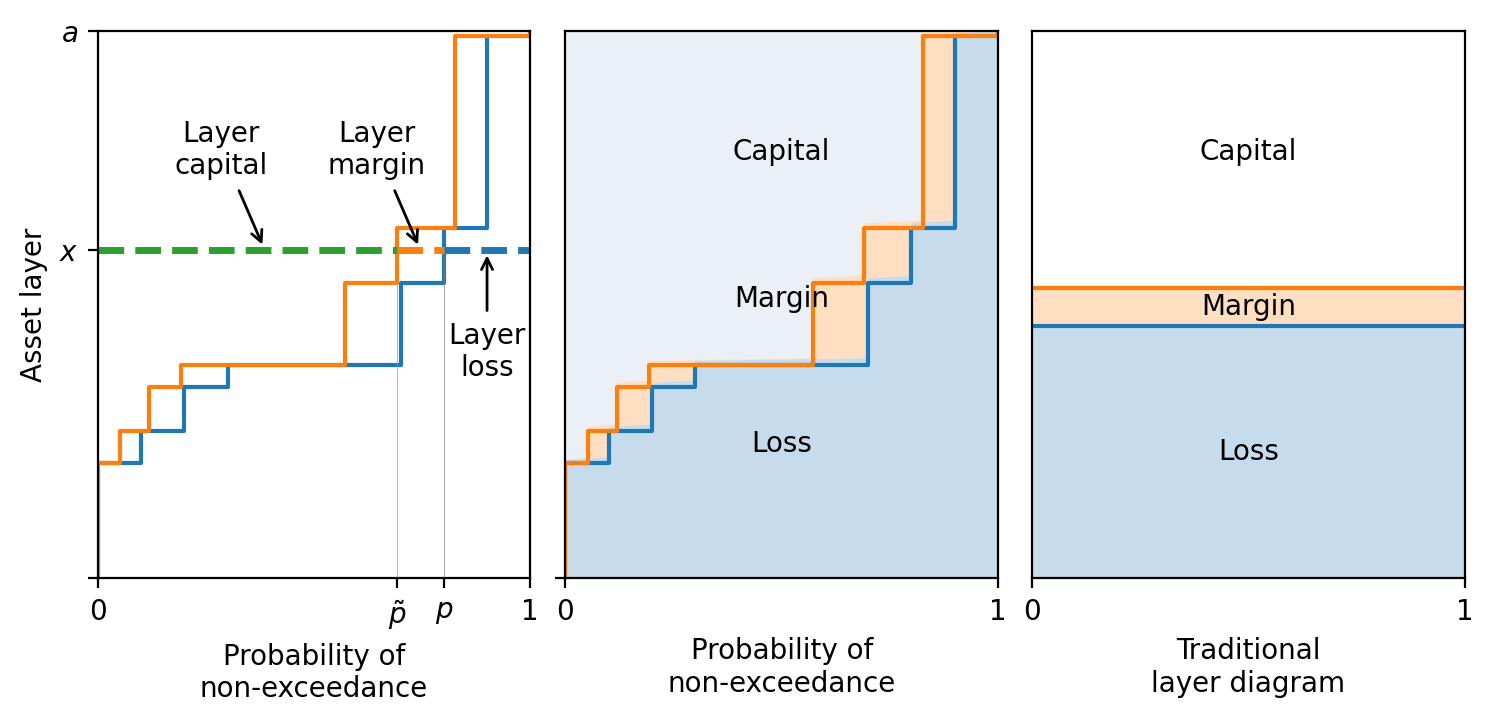

In [11]:
from aggregate.extensions.pir_figures import fig_10_5
d = port.dists['wang']
fig_10_5(port=port, dist=d, x=60)

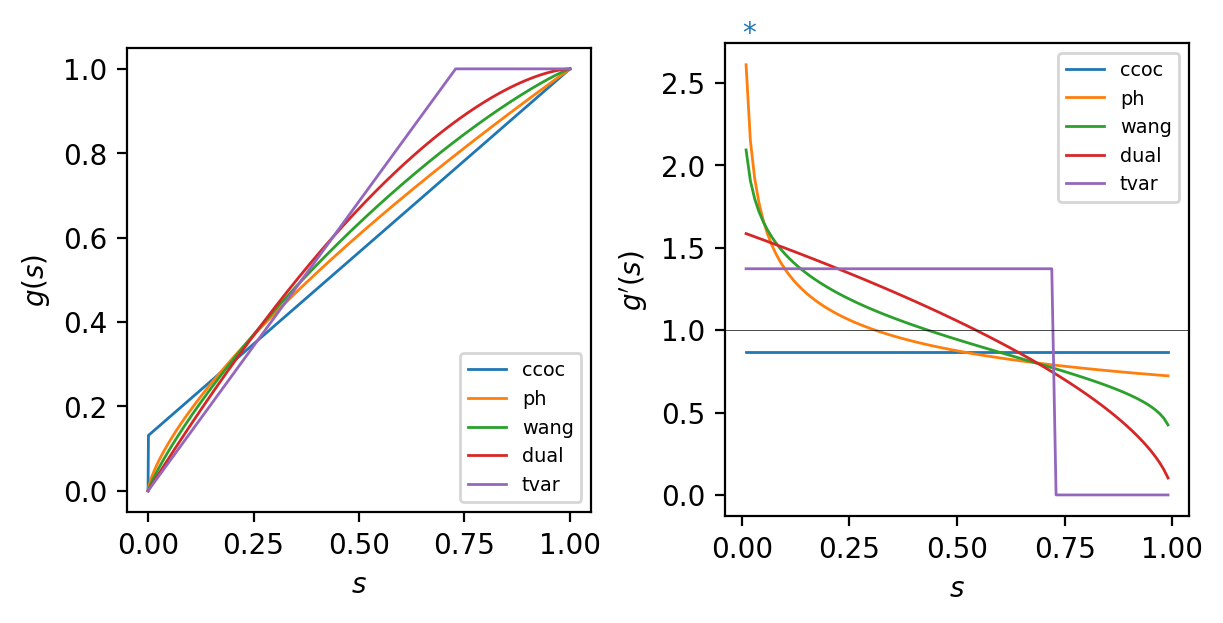

time: 472 ms (started: 2025-06-09 17:16:55 +01:00)


In [260]:
#| label: fig-market
#| fig-cap: "Distorted exceedance ($g(s)$, left) and distorted probabilities ($q$, right) by distortion type."
# put formatter back
pd.options.display.float_format = my_ff
fig, axs = plt.subplots(1, 2, figsize=(3*3, 3), constrained_layout=True, sharey=False)
ax0, ax1, ax2 = axs.flat
ps = np.linspace(0, 1, 1001)

colors = {k: f'C{i}' for i, k in enumerate(wport.dists.keys())}

ax = ax0
for (k, v) in wport.dists.items():
    ax.plot(ps, v.g(ps), lw=1, label=k, c=colors[k])
ax.set(aspect='equal', xlabel='$s$', ylabel='$g(s)$')  
ax.legend(loc='lower right', fontsize='x-small')


ax = ax1
ps = np.linspace(0, 1, 101)
ps = ps[1:-1]
for (k, v) in wport.dists.items():
    ax.plot(ps, list(map(v.g_prime, ps)), lw=1, label=k, c=colors[k])
ax.set(xlabel='$s$', ylabel="$g'(s)$")  
ax.legend(loc='upper right', fontsize='x-small')
ax.text(0, 2.75, '*', c=colors['ccoc'])
ax.axhline(1, lw=0.25, c='k');
exhibits['fig-The5dists'] = f

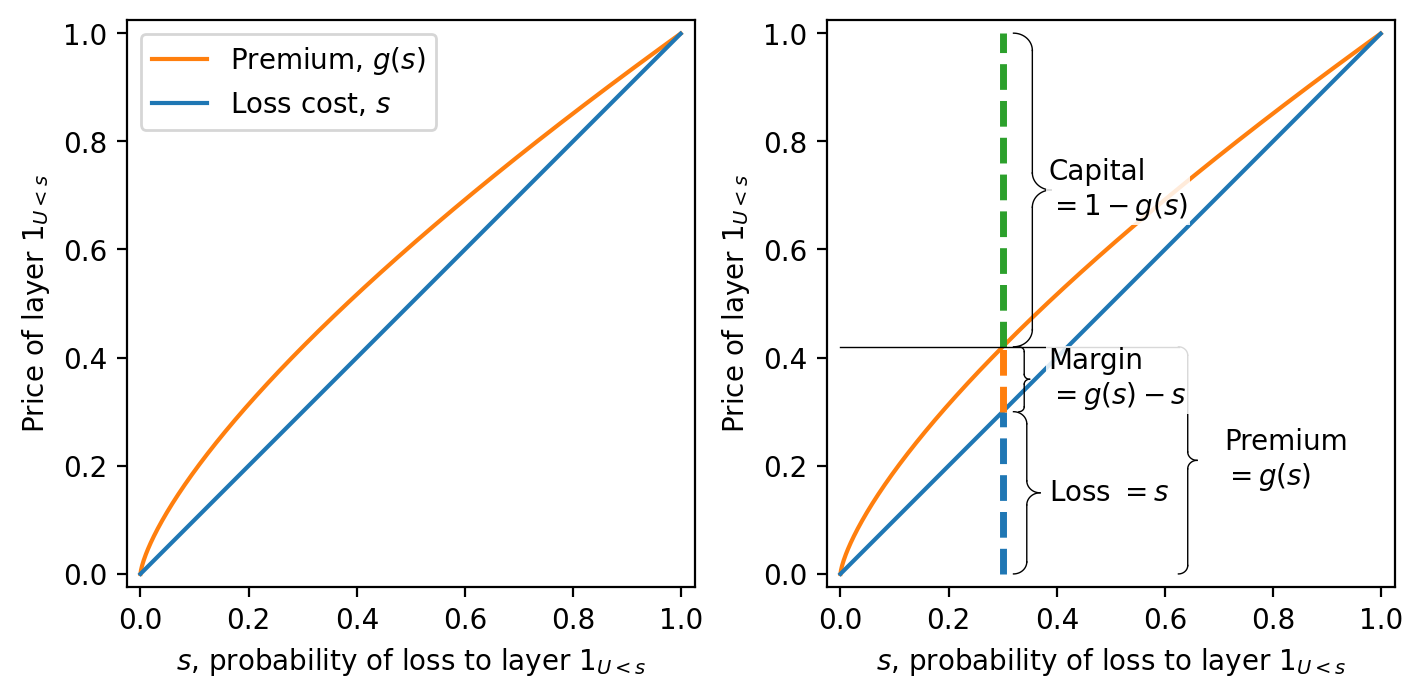

In [14]:
#| echo: false
#| label: fig-dist-ins
#| fig-cap: "A distortion in orange compared to expected loss in blue (left). Relation to meaningful insurance statistics for each layer of loss (right)."
from aggregate.extensions.pir_figures import fig_10_3
from aggregate import Distortion
d = Distortion.ph(.6)
d = port.dists['ph']
fig_10_3(d)


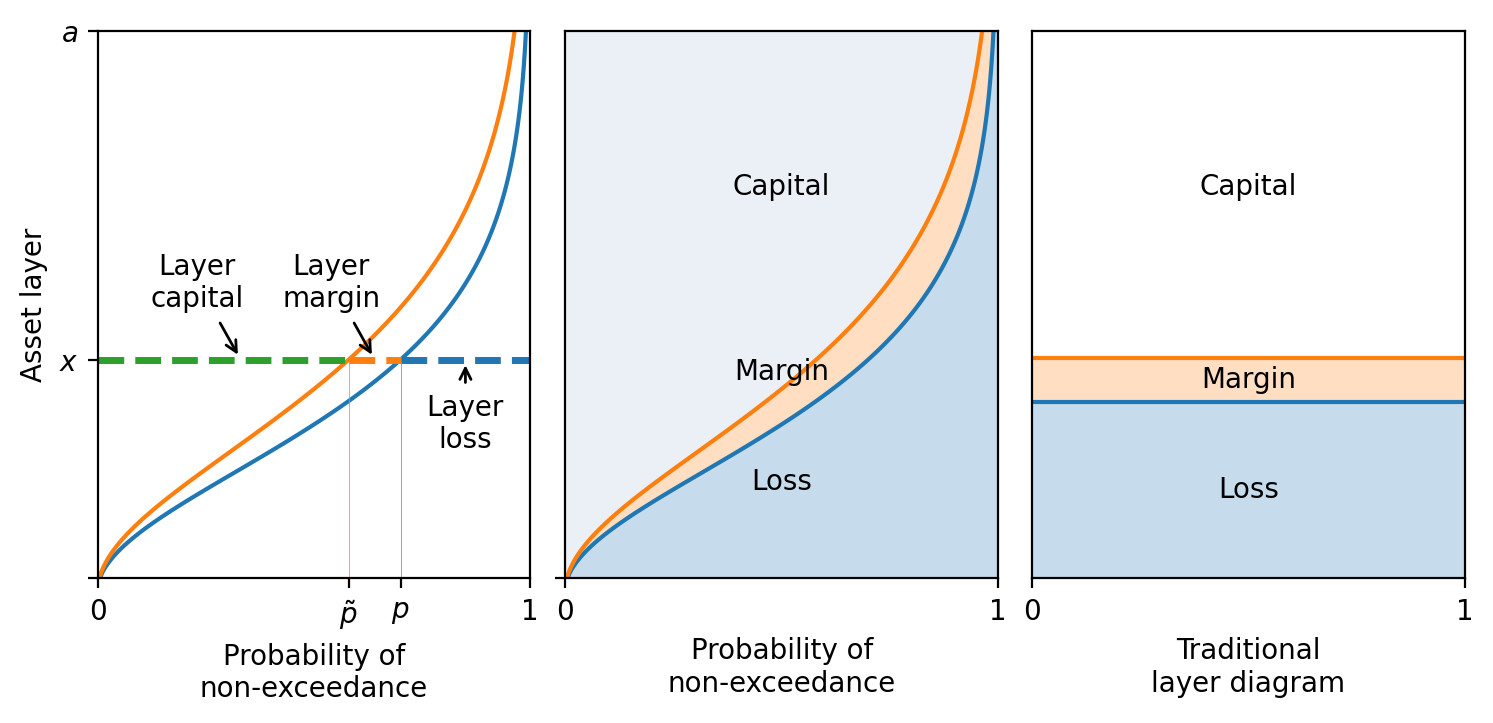

In [15]:
from aggregate.extensions.pir_figures import fig_10_5
fig_10_5(dist=d)

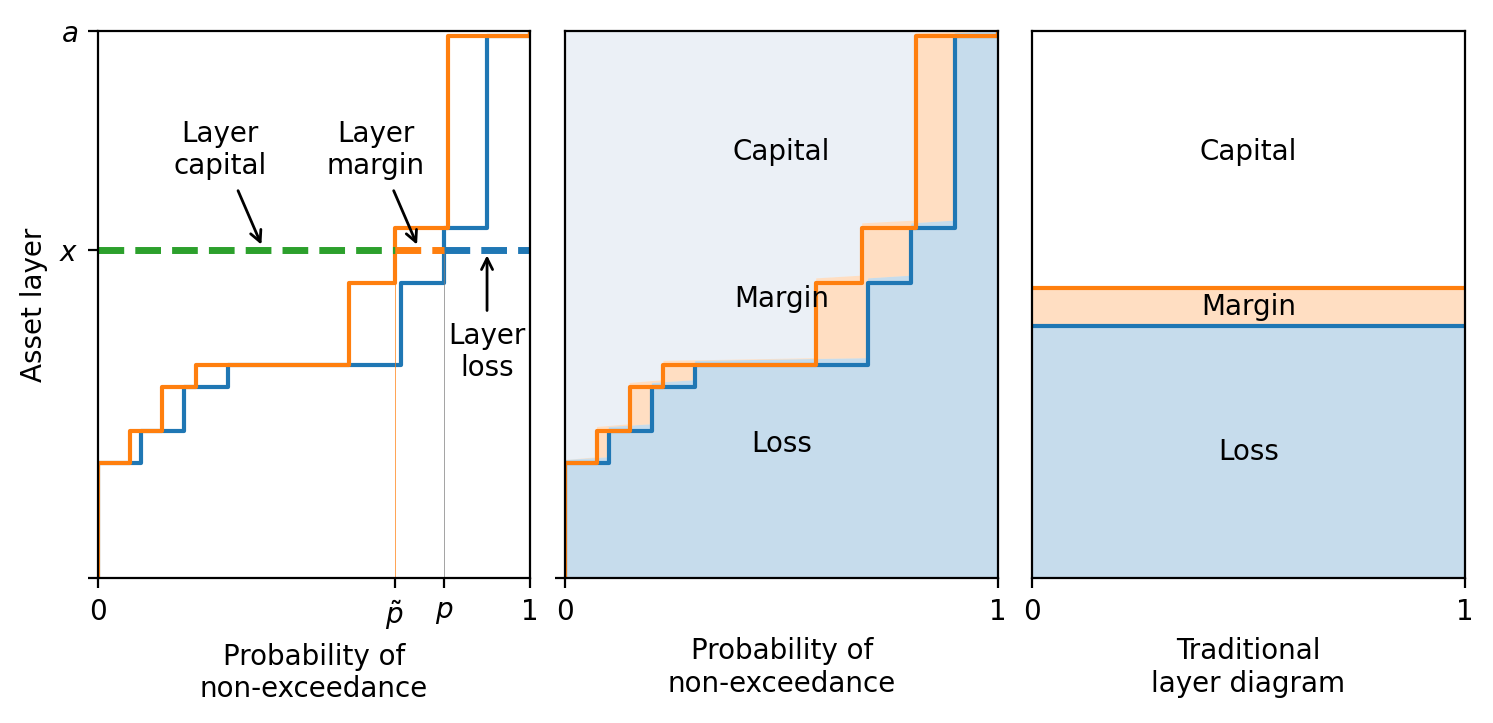

In [16]:
fig_10_5(port=port, dist=d, x=60)

In [18]:
#| echo: false
g = wport.dists['dual']
bit = port.density_df.query('p_total > 0')[['p_total','S']]
bit.index.name = 'loss'
bit = bit.rename(columns={'p_total': 'p'})
bit['gS'] = g.g(bit.S)
bit['q'] = -np.diff(bit.gS, prepend=1)
bit['dx'] = np.diff(bit.index, prepend=0)
bit0 = bit.copy()
bit.loc['Total', :] = [(bit0.p * bit0.index).sum(),
                       (bit0.S.shift(1, fill_value=1) * bit0.dx).sum(),
                       (bit0.gS.shift(1, fill_value=1) * bit0.dx).sum(),
                       (bit0.q * bit0.index).sum(),
                       bit0.dx.sum()]
fGT(bit)

loss,p,S,gS,q,dx
22,0.100,0.900,0.975,0.025,22
28,0.100,0.800,0.923,0.051,6
36,0.100,0.700,0.853,0.070,8
40,0.400,0.300,0.434,0.420,4
55,0.100,0.200,0.299,0.134,15
65,0.100,0.100,0.155,0.145,10
100,0.100,0,0,0.155,35
Total,46.600,46.600,53.565,53.565,100


In [19]:
#| echo: false
#| label: tbl-dual-1
#| tbl-cap: Expected loss `L`, premium `P`, and loss ratio `LR` by unit
fGT(gcn(ans.df.loc['dual'])[['L', 'P', 'LR']])


unit,L,P,LR
X1,31.700,32.310,0.981
X2,14.900,21.256,0.701
X2 ceded,3.500,5.415,0.646
X2 net,11.400,15.841,0.720
total,46.600,53.565,0.870


In [20]:
#| label: tbl-dual-2
#| tbl-cap: "Expected loss, premium, margin, capital, assets, loss ratio, leverage `PQ`, and cost of capital by unit."

fGT(gcn(ans.df.loc['dual']))

unit,L,P,M,Q,a,LR,PQ,COC
X1,31.700,32.310,0.610,13.826,46.136,0.981,2.337,0.044
X2,14.900,21.256,6.356,32.609,53.864,0.701,0.652,0.195
X2 ceded,3.500,5.415,1.915,13.125,18.539,0.646,0.413,0.146
X2 net,11.400,15.841,4.441,19.484,35.325,0.720,0.813,0.228
total,46.600,53.565,6.965,46.435,100,0.870,1.154,0.150


In [23]:
#| label: tbl-ra-comp
#| tbl-cap: Model loss ratios by distortion

pd.options.display.float_format = lambda x: f'{x:.1%}'
fGT(ans.df[['LR']].unstack(1).droplevel(0,1).rename(columns=gcn_namer), ratio_cols='all')


distortion,X1,X2 net,X2 ceded,total
ccoc,102.8%,75.3%,46.0%,87.0%
ph,101.7%,72.5%,52.5%,87.0%
wang,100.1%,72.1%,57.5%,87.0%
dual,98.1%,72.0%,64.6%,87.0%
tvar,95.7%,72.9%,72.9%,87.0%


In [25]:
#| label: tbl-cocs
#| tbl-cap: "Model indicated CoC for equity and reinsurance capital."

# Ceded capital benefit is 35 - cat bond collateral amounts
# a = 35; ceded ROE from reinsurance:

re_coc = ans.df[['M']].unstack(1).droplevel(0,1)[['X3']] / (35 - ans.df[['P']].unstack(1).droplevel(0,1)[['X3']])
eq_coc =  (.15 * 46.434783 -  (35 - ans.df[['P']].unstack(1).droplevel(0,1)[['X3']]) * re_coc.values) / (46.434783 - (35 - ans.df[['P']].unstack(1).droplevel(0,1)[['X3']]))
c = re_coc.copy()
c.X3 = .15
fGT(pd.concat((re_coc, eq_coc, c), keys=['Reins', 'Equity', 'Capital'], axis=1).droplevel(1,1),
   ratio_cols='all')

distortion,Reins,Equity,Capital
ccoc,15.0%,15.0%,15.0%
ph,11.2%,21.0%,15.0%
wang,8.9%,25.0%,15.0%
dual,6.5%,30.0%,15.0%
tvar,4.3%,34.9%,15.0%


In [29]:
#| label: tbl-ra-comp-2
#| tbl-cap: Natural allocation CoC by distortion
fGT(ans.df[['COC']].unstack(1).droplevel(0,1).rename(columns=gcn_namer), ratio_cols='all')


distortion,X1,X2 net,X2 ceded,total
ccoc,15.0%,15.0%,15.0%,15.0%
ph,-8.9%,18.9%,18.0%,15.0%
wang,-0.3%,22.4%,18.3%,15.0%
dual,4.4%,22.8%,14.6%,15.0%
tvar,10.0%,22.0%,10.1%,15.0%


In [31]:
#| label: tbl-dist-df
#| tbl-cap: "Distortion parameters at 15 percent target pricing."
# put formatter back
pd.options.display.float_format = my_ff
fGT(port.distortion_df.droplevel([0,1], 0)[["P","COC","param","error"]],
    ratio_cols='COC')


method,P,COC,param,error
ccoc,53.565,15.0%,0.150,0
ph,53.565,15.0%,0.720,3.2978e-10
wang,53.565,15.0%,0.343,1.2525e-08
dual,53.565,15.0%,1.595,-3.3927e-07
tvar,53.565,15.0%,0.271,7.6102e-06


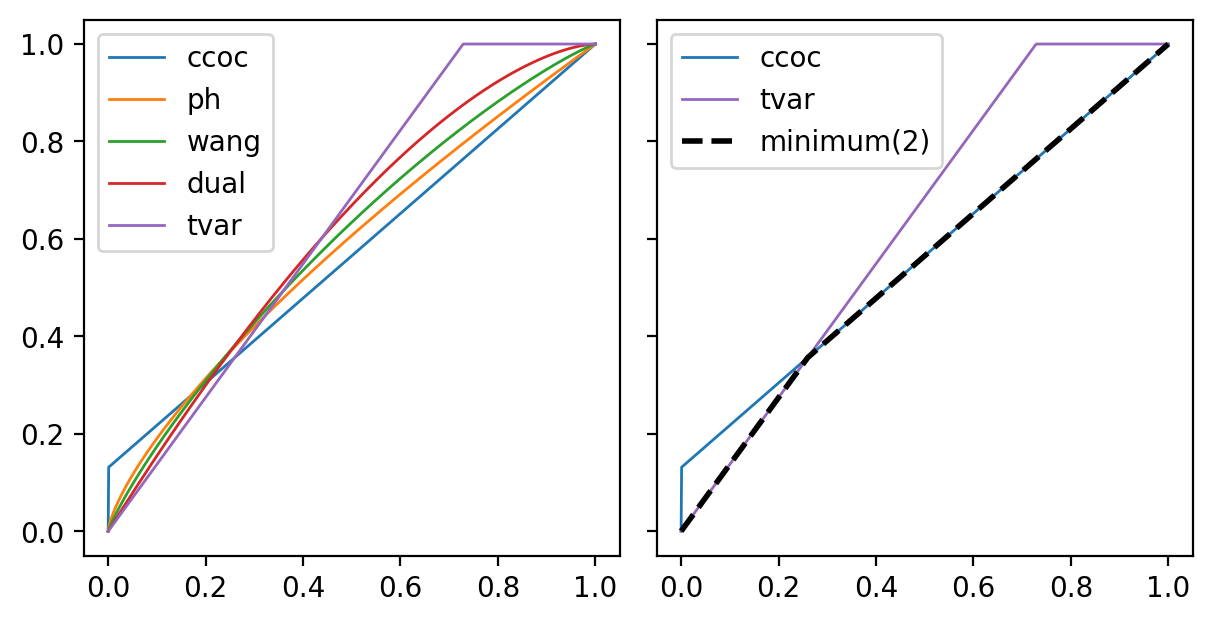

In [35]:
#| label: fig-market
#| fig-cap: "Five distortions calibrated to 15 percent return pricing (left). The minimum of CCoC and TVaR pricing (right)."
# put formatter back
pd.options.display.float_format = my_ff
fig, axs = plt.subplots(1, 2, figsize=(2*3, 3), constrained_layout=True, sharey=True)
ax0, ax1 = axs.flat
ps = np.linspace(0, 1, 1001)

colors = {k: f'C{i}' for i, k in enumerate(wport.dists.keys())}

ax = ax0
for (k, v) in wport.dists.items():
    ax.plot(ps, v.g(ps), lw=1, label=k, c=colors[k])
ax.set(aspect='equal')
ax.legend(loc='upper left')

ccoc = wport.dists['ccoc']
tvar = wport.dists['tvar']
min_g = Distortion.minimum([ccoc, tvar])
colors[min_g.name] = 'k'

ax = ax1
for g in [ccoc, tvar, min_g]:
    ax.plot(ps, g.g(ps), lw=2 if g is min_g else 1,
            ls='--' if g is min_g else '-',
            label=g.name, c=colors[g.name])
ax.set(aspect='equal')
ax.legend(loc='upper left')

In [39]:
import sys
sys.path.append(r'C:\Users\steve\S\TELOS\Blog\quarto\ConvexConsiderations\posts\presentations\2025-02-23-Going-Spectral')
import tranching_problem_code as tpc

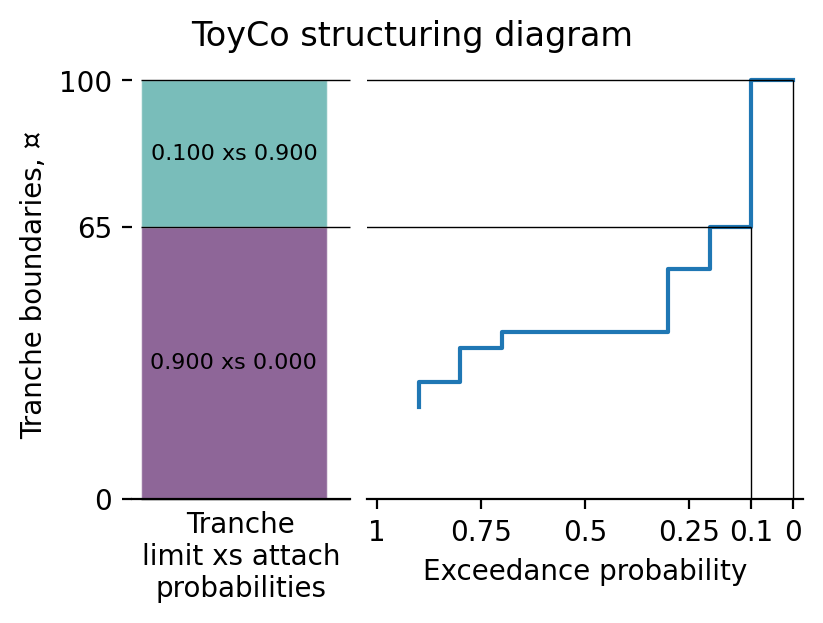

In [40]:
#| echo: false
a = 100
layering = tpc.make_and_plot_layering_small(port, a, .9)


In [41]:
#| echo: false
ans = tpc.ccoc_tvar_pricing(port, layering, a)
tpc.roe_lr(ans)


metric     Premium                 ROE             Loss ratio            
layer       Equity  Debt  Total Equity  Debt Total     Equity  Debt Total
distortion                                                               
ccoc        45.957 7.609 53.565  0.150 0.150 0.150      0.938 0.460 0.870
tvar        48.762 4.803 53.565  0.349 0.043 0.150      0.884 0.729 0.870
min_g       45.658 4.803 50.461  0.132 0.043 0.078      0.944 0.729 0.923

In [42]:
equal_s = tpc.equal_s(port)
layering_opt = tpc.make_and_plot_layering_small(port, a, 1 - equal_s, plot=False)
ans_opt = tpc.ccoc_tvar_pricing(port, layering_opt, a)
tpc.roe_lr(ans_opt)


metric     Premium                  ROE             Loss ratio            
layer       Equity   Debt  Total Equity  Debt Total     Equity  Debt Total
distortion                                                                
ccoc        42.913 10.652 53.565  0.150 0.150 0.150      0.958 0.516 0.870
tvar        46.018  7.548 53.565  0.547 0.055 0.150      0.893 0.729 0.870
min_g       42.913  7.548 50.461  0.150 0.055 0.078      0.958 0.729 0.923

In [43]:
s_values = port.density_df.query('p_total > 0').F.values
placed = tpc.placement_analysis(port, a, s_values)
placed.columns = ['p break', 'Equity', 'Eq Cost', 'Debt Cost', 'Placeable Prem', 'Min Prem']
placed = placed.set_index('p break')


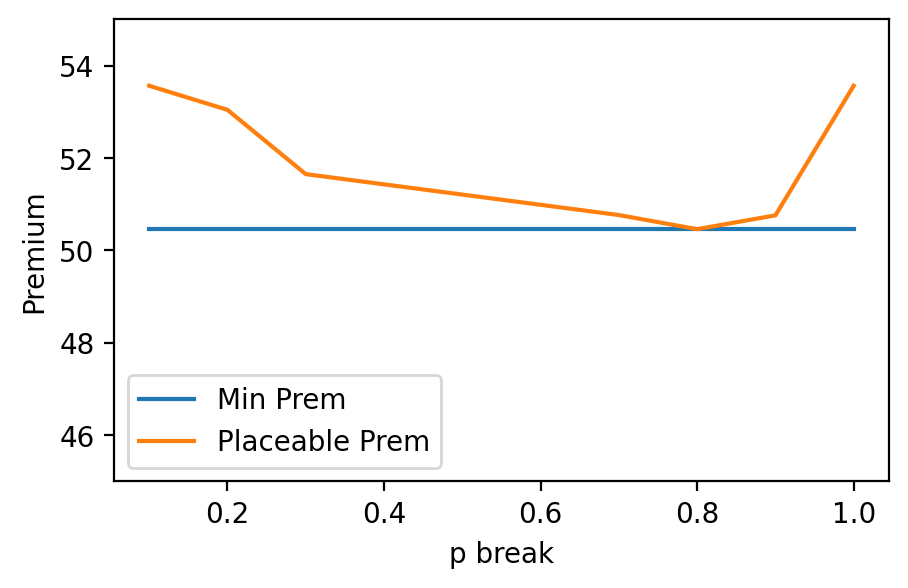

In [44]:
#| echo: false
ax = placed['Min Prem'].plot(figsize=(5,3))
placed['Placeable Prem'].plot(ax=ax)
ax.legend(loc='lower left')
ax.set(ylim= [45, 55],
       xlabel='p break',
       ylabel='Premium');
